In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lec_act_9_simulation.ipynb")

# Iterative systems part II

This is a continuation/extension of week 5's simulation with some slight modifications (Week_5_systems/c_tutorial_iterative_systems.ipynb)

- Full 2D - position and velocity of a point in space
- Integrate velocity as well as position
- Acceleration is a function of an inclined plane

Slides: https://docs.google.com/presentation/d/1jDIVbp7EkyqVJJCpXnkg9KQl6stHF9WohauL1Lnr3YM/edit?usp=sharing


In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial

## Acceleration from an inclined plane

TODO Given the angle between a line and a horizontal line, calculate the acceleration for a box on the line

The math for this is pretty straight forward: the only tricky part is that (unlike all the figures shown on-line) you'll need to consider both an inclined line that slopes down from left to right (in which case the box slides to the right and down) AND a line that slopes sup from left to right (in which case the box slides to the left and down). Gravity always points down and is assumed to be -9.8N.

Assumption: mass is 1, so F=ma means a is F/1.

Input: The line in the form a0 + a1x = y, where a0 and a1 are constants, gravity = 0, -9.8
Output: An acceleration vector ax, ay

In [3]:
# This is makes this slightly safer than defining a variable 
def gravity():
    return -9.8

In [4]:
def compute_acceleration(a0, a1):
    """TODO Compute the acceleration of a mass = 1 frictionless box on a line y = a0 + a1 x, assuming gravity of -9.8
    @return ax, ay - 2d vector for the acceleration"""
    
    g = [0, gravity()]

    magnitude = np.sqrt(1 + a1**2)
    incline_vector = [1/magnitude, a1/magnitude]
    
    g_dot_incline = np.dot(g, incline_vector)

    ax = incline_vector[0] * g_dot_incline
    ay = incline_vector[1] * g_dot_incline

    return ax, ay

In [5]:
# Horizontal line should produce no acceleration
# y = a0 + 0 x
fx_flat, fy_flat = compute_acceleration(3.0, 0.0)
assert np.isclose(fx_flat, 0.0), np.isclose(fy_flat, 0.0) 

In [6]:
# 45 degree slope pointing down to the right should have fx and fy magnitudes the same
# y = a0 + x
fx_flat, fy_flat = compute_acceleration(0.0, 1.0)
assert np.isclose(fx_flat, fy_flat) 

In [7]:
# 45 degree slope pointing down to the LEFT should have fx and fy magnitudes the same, but in opposite directions
# y = a0 - x
fx_flat, fy_flat = compute_acceleration(0.0, -1.0)
assert np.isclose(fx_flat, -fy_flat) 

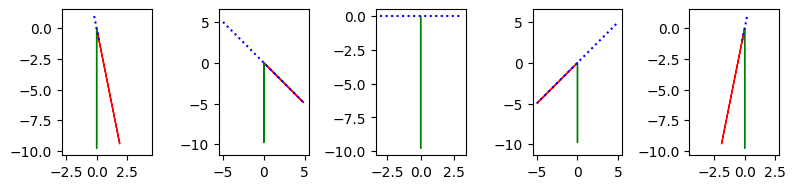

In [8]:
# This is for visualization purposes; it shows the lines (in black) with
#  your calculated acceleration vectors in red and gravity in green
# Feel free to edit
# Note that your acceleration vectors should lie on top of the lines and point down
fig, axs = plt.subplots(1, 5, figsize=(8, 2))

for ind, (a1, x_limit) in enumerate(zip((-5, -1, 0, 1, 5),(0.2, 5, 3, 5, 0.2))):
    # Plot line
    xs = np.linspace(-x_limit, x_limit, 3)
    # Doesn't really matter what the y intercept is
    ys = polynomial.polyval(xs, np.array([0, a1]))

    axs[ind].plot(xs, ys, ':b')
    axs[ind].axis('equal')

    f_x, f_y = compute_acceleration(a0=0, a1=a1)
    axs[ind].arrow(xs[1], ys[1], f_x, f_y, color='red')

    axs[ind].arrow(xs[1], ys[1], 0.0, gravity(), color='green')
fig.tight_layout()


In [9]:
grader.check("compute_acceleration")

compute_acceleration results: All test cases passed!

## One time step
TODO: Calculate new position and velocity, given position, velocity, and acceleration

In [10]:
def simulate_one_step(x, y, vx, vy, ax, ay, delta_t):
    """ TODO simulate one step forward using Euler integration 
       (x1 = x0 + delta_t * v0),
       (v1 = v0 + delta_t * a0)
       @param x, y - position
       @param vx, vy - velocity
       @param ax, ay - acceleration
       @return x_next, y_next, vx_next, vy_next"""
    x_next = x + delta_t * vx
    y_next = y + delta_t * vy

    vx_next = vx + delta_t * ax
    vy_next = vy + delta_t *ay

    return x_next, y_next, vx_next, vy_next

In [11]:
# Time step
delta_t = 0.1

x = 1
y = 2
vx = 0.1
vy = 0.3
ax = 0.001
ay = 1.0
xnew, ynew, vxnew, vynew = simulate_one_step(x, y, vx, vy, ax, ay, delta_t)

# Testing one of these here
assert np.isclose(xnew, x + vx * delta_t)

In [12]:
grader.check("compute_one_step")

compute_one_step results: All test cases passed!

# Simulation

Note that you could use either the number of time steps OR total time for the last parameter

Timesteps is a bit safer because at least you know it will only go for so many time steps...

In this activity we'll just loop over n time steps; we'll do something "smarter" in the lab

See Iterate n times in Lab 5 ODE systems for an example of how to store values in an array during a simulation time step


TODO: Fill in ret_pose_all

In [13]:
def simulate_n_time_steps(x, y, vx, vy, ax, ay, delta_t=0.1, n_time_steps=100):
    """ Call simulate_one_step multiple times and store it in a numpy array
    @param starting_state - the starting position, velocity, acceleration
    @param delta_t - the time step to use. Define a default t value that you've determined works well
    @param n_time_steps - how many time steps to take. Again, default to a reasonable number
    @return position values as a 2xtimesteps numpy array
    """
    # TODO
    #   Allocate an array to put all the x,y values in
    #   Loop n_time_steps
    #     Store the current x,y values in the array
    #     Call simulate_one_step with the current x,y,vx,vy values
    #     Save the returned x,y,vx,vy values as the "new" current x,y,vx,vy values
    #   return the array
    positions = np.zeros((n_time_steps, 2))

    positions[0] = x, y

    for i in range(1, n_time_steps):
        x, y, vx, vy = simulate_one_step(x, y, vx, vy, ax, ay, delta_t)
        positions[i] = x, y

    return positions.T #transpose to return expected shape


In [14]:
# Actually run the simulation
# Time step
delta_t = 0.1
x0 = 1
y0 = 2
vx0 = 0.1
vy0 = 0.3
ax = 0.001
ay = 1.0
ret_poses = simulate_n_time_steps(x0, y0, vx0, vy0, ax, ay, delta_t=delta_t, n_time_steps=15)
print(f"First pose: {ret_poses[:, 0]}")
print(f"Last pose: {ret_poses[:, -1]}")

assert np.isclose(ret_poses[0, 0], x0)
assert np.isclose(ret_poses[1, -1], 3.333, atol=0.01)


First pose: [1. 2.]
Last pose: [1.14091 3.33   ]


In [15]:
grader.check("simulate")

simulate results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [16]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS 2S5 (creates a set)
websites = {"N//A"}
# Approximate number of hours, including lab/in-class time
hours = 1

In [17]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

Double check your plots. 

- Submit this .ipynb file to lecture activity 9 (simulate)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Failures: None expected